In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

Import data for reliance

In [2]:
symbol = 'RELIANCE.NS'  
start = '2020-01-01'
end = '2024-12-31'

In [3]:
stock_data = yf.download(symbol, start=start, end=end)


[*********************100%%**********************]  1 of 1 completed


In [4]:
stock_data['Daily Return'] = stock_data['Adj Close'].pct_change()

Calculate Z-scores, T-scores, and Confidence Intervals for Volume, Close Price, and Daily Returns


In [5]:
vol_mean = stock_data['Volume'].mean()
vol_std = stock_data['Volume'].std()
vol_sample_size = stock_data['Volume'].dropna().count()
vol_z_scores = (stock_data['Volume'] - vol_mean) / vol_std

In [6]:
vol_t_score = stats.t.ppf((1 + 0.95) / 2., vol_sample_size - 1)
vol_marginoferror = vol_t_score * (vol_std / np.sqrt(vol_sample_size))
vol_confidence_interval = (vol_mean - vol_marginoferror, vol_mean + vol_marginoferror)


In [7]:
close_mean = stock_data['Adj Close'].mean()
close_std = stock_data['Adj Close'].std()
close_sample_size = stock_data['Adj Close'].dropna().count()
close_z_scores = (stock_data['Adj Close'] - close_mean) / close_std

In [8]:
close_t_score = stats.t.ppf((1 + 0.95) / 2., close_sample_size - 1)
close_marginoferror = close_t_score * (close_std / np.sqrt(close_sample_size))
close_confidence_interval = (close_mean - close_marginoferror, close_mean + close_marginoferror)


In [9]:
returns_mean = stock_data['Daily Return'].mean()
returns_std = stock_data['Daily Return'].std()
returns_sample_size = stock_data['Daily Return'].dropna().count()
returns_z_scores = (stock_data['Daily Return'] - returns_mean) / returns_std

In [10]:
returns_t_score = stats.t.ppf((1 + 0.95) / 2., returns_sample_size - 1)
returns_margin_of_error = returns_t_score * (returns_std / np.sqrt(returns_sample_size))
returns_confidence_interval = (returns_mean - returns_margin_of_error, returns_mean + returns_margin_of_error)


In [11]:
print(f"Confidence Interval for Daily Volume: {vol_confidence_interval}")
print(f"Confidence Interval for Daily Close Price: {close_confidence_interval}")
print(f"Confidence Interval for Daily Returns: {returns_confidence_interval}")

Confidence Interval for Daily Volume: (18682771.988883045, 20494105.474849638)
Confidence Interval for Daily Close Price: (1082.6263995680015, 1108.8674425468334)
Confidence Interval for Daily Returns: (-0.00035434614356483684, 0.0017501962767871816)


Plots

In [21]:
plt.figure(figsize=(20,20))


<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

Text(0, 0.5, 'Density')

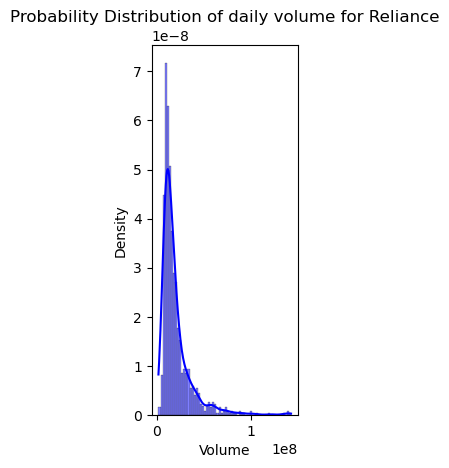

In [22]:
plt.subplot(1, 3, 1)
sns.histplot(stock_data['Volume'].dropna(), kde=True, color='blue', stat='density')
plt.title("Probability Distribution of daily volume for Reliance")
plt.xlabel('Volume')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

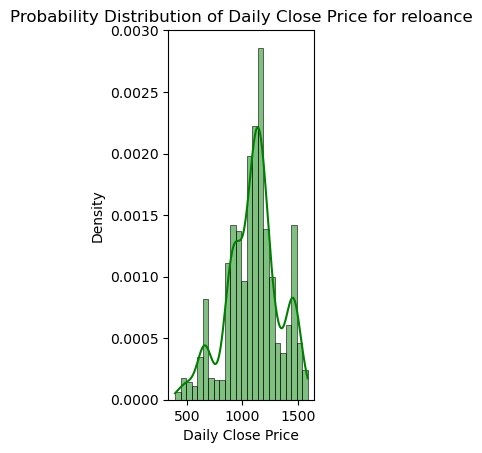

In [23]:
plt.subplot(1, 3, 2)
sns.histplot(stock_data['Adj Close'].dropna(), kde=True, color='green', stat='density')
plt.title("Probability Distribution of Daily Close Price for reloance")
plt.xlabel('Daily Close Price')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

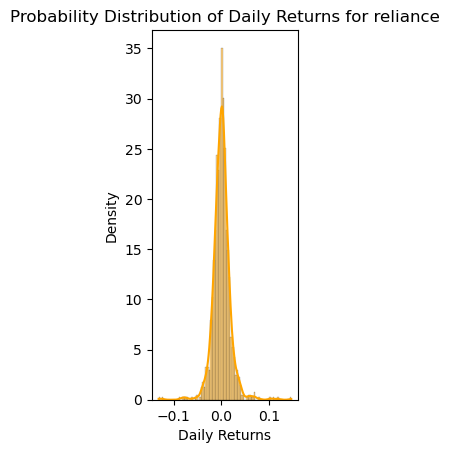

In [24]:
plt.subplot(1, 3, 3)
sns.histplot(stock_data['Daily Return'].dropna(), kde=True, color='orange', stat='density')
plt.title(f"Probability Distribution of Daily Returns for reliance")
plt.xlabel('Daily Returns')
plt.ylabel('Density')